# Machine Learning Classification Model for prediction of Titanic Survivors

## The folllowing is the model for the dataset on Titanic Survivors and the prediction of Titanic Survivors by using CatBoostClassifier. The train.csv dataset contains 892 entries and the test.csv dataset contains 418 entries to which the prediction is outputed into the gender_submission_pred.csv. You can follow through to see the operations performed on the data and the model built for the prediction.

## The first cell contains all the neccesary libraries that will be used in the model and all the preprocessing activities.

In [1]:
import datetime as dt
import time
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from catboost import CatBoostClassifier
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Getting the datasets


In [2]:
train = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\test.csv')
sub = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\gender_submission2.csv')

## Viewing the the train.csv dataset

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



## Viewing the the test.csv dataset 


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
1,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
2,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
3,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
4,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Visualizing the distribution of Clicked values in the train.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


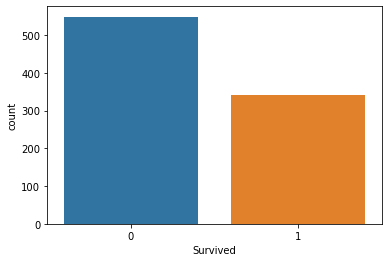

In [5]:
sns.countplot(train['Survived']);

## Finding out how many unique values are in each column in the train.csv dataset.

In [6]:
train.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

## Finding out the data types of the columns in the train.csv dataset for identification of Categorical data. The categorical data is identified by the datatype "object".

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Finding the null values in the train.csv dataset

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Finding the null values in the test.csv dataset

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Inputting missing values for both train.csv and test.csv datasets

In [10]:
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

## Checking if the missing values are filled in in train.csv

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Checking if the missing values are filled in in train.csv

In [12]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## First,we separate the train.csv dataset by getting a separate collection of the intended output for training the model. Dividing the train dataset to train the model. I also dropped some irrelevant data like 'Survived' which is being generated and "Name", "PassengerId" which is equivalent to a name, that doesn't repeat in the entire dataset, so it would not help in the model. "Cabin" had too many missing data points thus it was useless to the model since most of its values would have been filler/guesses.

In [13]:
X = train.drop(["Name","Cabin","PassengerId","Survived"], axis=1)
Y = train.Survived

## Dividing the train.csv dataset to train the model. You create a training dataset and a testing dataset from the train.csv dataset. The 0.20 signifies the division. So 80% for training and 20% for testing.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=54)

## Here, we are verifying the datatypes to ensure you get all the categorical data types. No preprocessing activities will be done on the categorical data, CatBoostClassifier will handle all of that to change the categorical data to numerical data to be used by the classification algorithm. 
## Categorical data in simple terms refers to data that refers to specific categories signified by words thus they can be converted to numeric data. words like "yes","no" and "maybe" are converted to 1, 2 and 3 instead. Machine Learning algorithms use mathematical calculations to calculate the predicitions behind the scenes so they need numbers to work, herego the "yes", "no" and "maybe" data is changed to numbers to be able to be used in the mathematical equation.

In [15]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

## This is the part where you identify all the categorical columns for CatBoost to do its thing.

In [16]:
cat_features = ["Sex","Ticket", "Embarked"]

## Here I use the GridSearchCV to check the best parameters to use in the model.

In [17]:
start_time = time.time()
cat_model = CatBoostClassifier()
parameters = {'depth': [2,4,6,8],'learning_rate' : [0.01,0.03,0.05,0.1],'iterations' : [1000,2000,4000,5000,10000]}
grid = GridSearchCV(estimator=cat_model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, Y_train, cat_features = cat_features, plot = True)
print("--- %s seconds ---" % (time.time() - start_time))

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79634831 0.78089888 0.78651685 0.78089888 0.80196629 0.77949438
        nan 0.77668539        nan        nan 0.7752809  0.7752809
 0.78792135 0.7738764  0.77949438 0.77106742 0.78932584        nan
 0.7738764  0.76404494 0.79494382 0.80196629 0.78932584 0.78932584
 0.7991573  0.79353933 0.78511236 0.78230337 0.7991573  0.79213483
 0.78792135 0.78089888 0.79634831 0.79353933 0.78511236 0.77949438
 0.78932584 0.78651685 0.78511236 0.7738764         nan        nan
        nan 0.79353933 0.80477528 0.80617978 0.79634831 0.78651685
 0.79775281 0.80617978 0.79353933 0.79213483 0.79775281 0.80758427
 0.78932584 0.79213483 0.8005618  0.80898876 0.79213483 0.79073034
 0.80337079 0.81460674 0.81320225 0.81601124 0.81039326 0.81320225
 0.81601124 0.81320225 0.80337079 0.81179775 0.81741573 0.81460674
 0.80617978 0.81179775 0.81601124 0.81460674 0.8075842

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6613652	total: 183ms	remaining: 12m 13s
1:	learn: 0.6349741	total: 202ms	remaining: 6m 43s
2:	learn: 0.6101126	total: 230ms	remaining: 5m 6s
3:	learn: 0.5967087	total: 241ms	remaining: 4m 1s
4:	learn: 0.5750184	total: 270ms	remaining: 3m 35s
5:	learn: 0.5651090	total: 277ms	remaining: 3m 4s
6:	learn: 0.5451012	total: 304ms	remaining: 2m 53s
7:	learn: 0.5308318	total: 330ms	remaining: 2m 44s
8:	learn: 0.5143326	total: 356ms	remaining: 2m 38s
9:	learn: 0.5035640	total: 378ms	remaining: 2m 30s
10:	learn: 0.4930847	total: 407ms	remaining: 2m 27s
11:	learn: 0.4841219	total: 437ms	remaining: 2m 25s
12:	learn: 0.4762531	total: 476ms	remaining: 2m 25s
13:	learn: 0.4640165	total: 505ms	remaining: 2m 23s
14:	learn: 0.4591402	total: 536ms	remaining: 2m 22s
15:	learn: 0.4562841	total: 543ms	remaining: 2m 15s
16:	learn: 0.4537240	total: 550ms	remaining: 2m 8s
17:	learn: 0.4439019	total: 578ms	remaining: 2m 7s
18:	learn: 0.4398084	total: 595ms	remaining: 2m 4s
19:	learn: 0.4380231	total:

165:	learn: 0.2557570	total: 3.9s	remaining: 1m 29s
166:	learn: 0.2551914	total: 3.92s	remaining: 1m 29s
167:	learn: 0.2544731	total: 3.95s	remaining: 1m 30s
168:	learn: 0.2541527	total: 3.97s	remaining: 1m 29s
169:	learn: 0.2541210	total: 3.98s	remaining: 1m 29s
170:	learn: 0.2533229	total: 4s	remaining: 1m 29s
171:	learn: 0.2526773	total: 4.03s	remaining: 1m 29s
172:	learn: 0.2523538	total: 4.05s	remaining: 1m 29s
173:	learn: 0.2516181	total: 4.08s	remaining: 1m 29s
174:	learn: 0.2507891	total: 4.1s	remaining: 1m 29s
175:	learn: 0.2505252	total: 4.14s	remaining: 1m 29s
176:	learn: 0.2499217	total: 4.16s	remaining: 1m 29s
177:	learn: 0.2494878	total: 4.19s	remaining: 1m 29s
178:	learn: 0.2493397	total: 4.21s	remaining: 1m 29s
179:	learn: 0.2490485	total: 4.24s	remaining: 1m 29s
180:	learn: 0.2485712	total: 4.26s	remaining: 1m 29s
181:	learn: 0.2481759	total: 4.29s	remaining: 1m 29s
182:	learn: 0.2479464	total: 4.31s	remaining: 1m 29s
183:	learn: 0.2476277	total: 4.33s	remaining: 1m 29

327:	learn: 0.1750475	total: 8.11s	remaining: 1m 30s
328:	learn: 0.1747186	total: 8.13s	remaining: 1m 30s
329:	learn: 0.1746777	total: 8.15s	remaining: 1m 30s
330:	learn: 0.1744500	total: 8.18s	remaining: 1m 30s
331:	learn: 0.1737827	total: 8.2s	remaining: 1m 30s
332:	learn: 0.1729664	total: 8.23s	remaining: 1m 30s
333:	learn: 0.1722304	total: 8.26s	remaining: 1m 30s
334:	learn: 0.1719083	total: 8.29s	remaining: 1m 30s
335:	learn: 0.1715386	total: 8.31s	remaining: 1m 30s
336:	learn: 0.1714656	total: 8.33s	remaining: 1m 30s
337:	learn: 0.1704730	total: 8.36s	remaining: 1m 30s
338:	learn: 0.1698724	total: 8.38s	remaining: 1m 30s
339:	learn: 0.1697066	total: 8.4s	remaining: 1m 30s
340:	learn: 0.1693603	total: 8.43s	remaining: 1m 30s
341:	learn: 0.1687131	total: 8.45s	remaining: 1m 30s
342:	learn: 0.1684244	total: 8.47s	remaining: 1m 30s
343:	learn: 0.1671245	total: 8.5s	remaining: 1m 30s
344:	learn: 0.1671005	total: 8.53s	remaining: 1m 30s
345:	learn: 0.1667679	total: 8.56s	remaining: 1m 

484:	learn: 0.1201954	total: 12.4s	remaining: 1m 29s
485:	learn: 0.1199469	total: 12.4s	remaining: 1m 29s
486:	learn: 0.1193328	total: 12.5s	remaining: 1m 29s
487:	learn: 0.1193066	total: 12.5s	remaining: 1m 29s
488:	learn: 0.1188604	total: 12.5s	remaining: 1m 29s
489:	learn: 0.1184931	total: 12.6s	remaining: 1m 29s
490:	learn: 0.1181323	total: 12.6s	remaining: 1m 29s
491:	learn: 0.1179830	total: 12.6s	remaining: 1m 29s
492:	learn: 0.1179533	total: 12.6s	remaining: 1m 29s
493:	learn: 0.1178341	total: 12.7s	remaining: 1m 29s
494:	learn: 0.1177684	total: 12.7s	remaining: 1m 29s
495:	learn: 0.1175302	total: 12.7s	remaining: 1m 29s
496:	learn: 0.1171878	total: 12.7s	remaining: 1m 29s
497:	learn: 0.1169986	total: 12.8s	remaining: 1m 29s
498:	learn: 0.1164216	total: 12.8s	remaining: 1m 29s
499:	learn: 0.1160846	total: 12.8s	remaining: 1m 29s
500:	learn: 0.1160266	total: 12.9s	remaining: 1m 29s
501:	learn: 0.1157397	total: 12.9s	remaining: 1m 29s
502:	learn: 0.1155215	total: 12.9s	remaining: 

645:	learn: 0.0865841	total: 17s	remaining: 1m 28s
646:	learn: 0.0865244	total: 17s	remaining: 1m 28s
647:	learn: 0.0864967	total: 17s	remaining: 1m 28s
648:	learn: 0.0864360	total: 17.1s	remaining: 1m 28s
649:	learn: 0.0862030	total: 17.1s	remaining: 1m 28s
650:	learn: 0.0859841	total: 17.1s	remaining: 1m 28s
651:	learn: 0.0859178	total: 17.1s	remaining: 1m 27s
652:	learn: 0.0858125	total: 17.2s	remaining: 1m 28s
653:	learn: 0.0857697	total: 17.2s	remaining: 1m 28s
654:	learn: 0.0857591	total: 17.2s	remaining: 1m 28s
655:	learn: 0.0856971	total: 17.3s	remaining: 1m 27s
656:	learn: 0.0856393	total: 17.3s	remaining: 1m 27s
657:	learn: 0.0854799	total: 17.3s	remaining: 1m 27s
658:	learn: 0.0853302	total: 17.3s	remaining: 1m 27s
659:	learn: 0.0849903	total: 17.4s	remaining: 1m 27s
660:	learn: 0.0847070	total: 17.4s	remaining: 1m 27s
661:	learn: 0.0844068	total: 17.4s	remaining: 1m 27s
662:	learn: 0.0841912	total: 17.5s	remaining: 1m 27s
663:	learn: 0.0840521	total: 17.5s	remaining: 1m 27s

801:	learn: 0.0676669	total: 21.3s	remaining: 1m 24s
802:	learn: 0.0676364	total: 21.3s	remaining: 1m 24s
803:	learn: 0.0675947	total: 21.3s	remaining: 1m 24s
804:	learn: 0.0673716	total: 21.3s	remaining: 1m 24s
805:	learn: 0.0673049	total: 21.4s	remaining: 1m 24s
806:	learn: 0.0671006	total: 21.4s	remaining: 1m 24s
807:	learn: 0.0669390	total: 21.4s	remaining: 1m 24s
808:	learn: 0.0668487	total: 21.5s	remaining: 1m 24s
809:	learn: 0.0668322	total: 21.5s	remaining: 1m 24s
810:	learn: 0.0666815	total: 21.5s	remaining: 1m 24s
811:	learn: 0.0664908	total: 21.5s	remaining: 1m 24s
812:	learn: 0.0663296	total: 21.6s	remaining: 1m 24s
813:	learn: 0.0663047	total: 21.6s	remaining: 1m 24s
814:	learn: 0.0662821	total: 21.6s	remaining: 1m 24s
815:	learn: 0.0661903	total: 21.6s	remaining: 1m 24s
816:	learn: 0.0661146	total: 21.7s	remaining: 1m 24s
817:	learn: 0.0659020	total: 21.7s	remaining: 1m 24s
818:	learn: 0.0658866	total: 21.7s	remaining: 1m 24s
819:	learn: 0.0658642	total: 21.7s	remaining: 

958:	learn: 0.0539396	total: 25.5s	remaining: 1m 20s
959:	learn: 0.0538570	total: 25.6s	remaining: 1m 20s
960:	learn: 0.0538269	total: 25.6s	remaining: 1m 20s
961:	learn: 0.0536364	total: 25.6s	remaining: 1m 20s
962:	learn: 0.0536336	total: 25.6s	remaining: 1m 20s
963:	learn: 0.0535966	total: 25.6s	remaining: 1m 20s
964:	learn: 0.0535574	total: 25.7s	remaining: 1m 20s
965:	learn: 0.0534183	total: 25.7s	remaining: 1m 20s
966:	learn: 0.0533410	total: 25.7s	remaining: 1m 20s
967:	learn: 0.0532976	total: 25.8s	remaining: 1m 20s
968:	learn: 0.0532452	total: 25.8s	remaining: 1m 20s
969:	learn: 0.0531979	total: 25.8s	remaining: 1m 20s
970:	learn: 0.0530225	total: 25.8s	remaining: 1m 20s
971:	learn: 0.0529975	total: 25.9s	remaining: 1m 20s
972:	learn: 0.0529855	total: 25.9s	remaining: 1m 20s
973:	learn: 0.0528988	total: 25.9s	remaining: 1m 20s
974:	learn: 0.0528945	total: 25.9s	remaining: 1m 20s
975:	learn: 0.0528690	total: 25.9s	remaining: 1m 20s
976:	learn: 0.0528108	total: 26s	remaining: 1m

1119:	learn: 0.0450509	total: 29.8s	remaining: 1m 16s
1120:	learn: 0.0450047	total: 29.9s	remaining: 1m 16s
1121:	learn: 0.0449613	total: 29.9s	remaining: 1m 16s
1122:	learn: 0.0449236	total: 29.9s	remaining: 1m 16s
1123:	learn: 0.0448609	total: 29.9s	remaining: 1m 16s
1124:	learn: 0.0448020	total: 30s	remaining: 1m 16s
1125:	learn: 0.0447758	total: 30s	remaining: 1m 16s
1126:	learn: 0.0447648	total: 30s	remaining: 1m 16s
1127:	learn: 0.0447514	total: 30s	remaining: 1m 16s
1128:	learn: 0.0446893	total: 30.1s	remaining: 1m 16s
1129:	learn: 0.0446304	total: 30.1s	remaining: 1m 16s
1130:	learn: 0.0444491	total: 30.1s	remaining: 1m 16s
1131:	learn: 0.0443937	total: 30.1s	remaining: 1m 16s
1132:	learn: 0.0443903	total: 30.2s	remaining: 1m 16s
1133:	learn: 0.0442553	total: 30.2s	remaining: 1m 16s
1134:	learn: 0.0441093	total: 30.2s	remaining: 1m 16s
1135:	learn: 0.0440971	total: 30.3s	remaining: 1m 16s
1136:	learn: 0.0439602	total: 30.3s	remaining: 1m 16s
1137:	learn: 0.0439049	total: 30.3s	

1273:	learn: 0.0390841	total: 33.9s	remaining: 1m 12s
1274:	learn: 0.0390524	total: 33.9s	remaining: 1m 12s
1275:	learn: 0.0390404	total: 34s	remaining: 1m 12s
1276:	learn: 0.0390221	total: 34s	remaining: 1m 12s
1277:	learn: 0.0389857	total: 34s	remaining: 1m 12s
1278:	learn: 0.0389285	total: 34s	remaining: 1m 12s
1279:	learn: 0.0388751	total: 34.1s	remaining: 1m 12s
1280:	learn: 0.0388625	total: 34.1s	remaining: 1m 12s
1281:	learn: 0.0388287	total: 34.1s	remaining: 1m 12s
1282:	learn: 0.0387828	total: 34.1s	remaining: 1m 12s
1283:	learn: 0.0386959	total: 34.2s	remaining: 1m 12s
1284:	learn: 0.0386528	total: 34.2s	remaining: 1m 12s
1285:	learn: 0.0385855	total: 34.2s	remaining: 1m 12s
1286:	learn: 0.0385126	total: 34.2s	remaining: 1m 12s
1287:	learn: 0.0385059	total: 34.3s	remaining: 1m 12s
1288:	learn: 0.0385033	total: 34.3s	remaining: 1m 12s
1289:	learn: 0.0384527	total: 34.3s	remaining: 1m 12s
1290:	learn: 0.0384298	total: 34.4s	remaining: 1m 12s
1291:	learn: 0.0383545	total: 34.4s	

1432:	learn: 0.0339714	total: 38.7s	remaining: 1m 9s
1433:	learn: 0.0339687	total: 38.8s	remaining: 1m 9s
1434:	learn: 0.0339627	total: 38.8s	remaining: 1m 9s
1435:	learn: 0.0338674	total: 38.8s	remaining: 1m 9s
1436:	learn: 0.0338513	total: 38.9s	remaining: 1m 9s
1437:	learn: 0.0338342	total: 38.9s	remaining: 1m 9s
1438:	learn: 0.0338001	total: 38.9s	remaining: 1m 9s
1439:	learn: 0.0337922	total: 38.9s	remaining: 1m 9s
1440:	learn: 0.0337658	total: 39s	remaining: 1m 9s
1441:	learn: 0.0337487	total: 39s	remaining: 1m 9s
1442:	learn: 0.0337083	total: 39s	remaining: 1m 9s
1443:	learn: 0.0336815	total: 39.1s	remaining: 1m 9s
1444:	learn: 0.0336629	total: 39.1s	remaining: 1m 9s
1445:	learn: 0.0336426	total: 39.1s	remaining: 1m 9s
1446:	learn: 0.0336142	total: 39.2s	remaining: 1m 9s
1447:	learn: 0.0336069	total: 39.2s	remaining: 1m 9s
1448:	learn: 0.0335980	total: 39.3s	remaining: 1m 9s
1449:	learn: 0.0335588	total: 39.3s	remaining: 1m 9s
1450:	learn: 0.0335350	total: 39.3s	remaining: 1m 9s

1589:	learn: 0.0301209	total: 43.5s	remaining: 1m 5s
1590:	learn: 0.0300197	total: 43.5s	remaining: 1m 5s
1591:	learn: 0.0300066	total: 43.5s	remaining: 1m 5s
1592:	learn: 0.0300066	total: 43.6s	remaining: 1m 5s
1593:	learn: 0.0299908	total: 43.7s	remaining: 1m 5s
1594:	learn: 0.0299778	total: 43.7s	remaining: 1m 5s
1595:	learn: 0.0299719	total: 43.7s	remaining: 1m 5s
1596:	learn: 0.0299459	total: 43.8s	remaining: 1m 5s
1597:	learn: 0.0298987	total: 43.8s	remaining: 1m 5s
1598:	learn: 0.0298373	total: 43.8s	remaining: 1m 5s
1599:	learn: 0.0298200	total: 43.8s	remaining: 1m 5s
1600:	learn: 0.0296636	total: 43.9s	remaining: 1m 5s
1601:	learn: 0.0296569	total: 43.9s	remaining: 1m 5s
1602:	learn: 0.0296060	total: 43.9s	remaining: 1m 5s
1603:	learn: 0.0295792	total: 43.9s	remaining: 1m 5s
1604:	learn: 0.0295612	total: 44s	remaining: 1m 5s
1605:	learn: 0.0295045	total: 44s	remaining: 1m 5s
1606:	learn: 0.0294862	total: 44s	remaining: 1m 5s
1607:	learn: 0.0294696	total: 44.1s	remaining: 1m 5s

1746:	learn: 0.0267630	total: 48.4s	remaining: 1m 2s
1747:	learn: 0.0267321	total: 48.4s	remaining: 1m 2s
1748:	learn: 0.0267289	total: 48.5s	remaining: 1m 2s
1749:	learn: 0.0267131	total: 48.5s	remaining: 1m 2s
1750:	learn: 0.0266497	total: 48.5s	remaining: 1m 2s
1751:	learn: 0.0266497	total: 48.5s	remaining: 1m 2s
1752:	learn: 0.0266401	total: 48.6s	remaining: 1m 2s
1753:	learn: 0.0266272	total: 48.6s	remaining: 1m 2s
1754:	learn: 0.0266184	total: 48.6s	remaining: 1m 2s
1755:	learn: 0.0266105	total: 48.7s	remaining: 1m 2s
1756:	learn: 0.0265801	total: 48.7s	remaining: 1m 2s
1757:	learn: 0.0265475	total: 48.7s	remaining: 1m 2s
1758:	learn: 0.0265234	total: 48.7s	remaining: 1m 2s
1759:	learn: 0.0265062	total: 48.8s	remaining: 1m 2s
1760:	learn: 0.0265013	total: 48.8s	remaining: 1m 2s
1761:	learn: 0.0264910	total: 48.8s	remaining: 1m 1s
1762:	learn: 0.0264785	total: 48.8s	remaining: 1m 1s
1763:	learn: 0.0264731	total: 48.9s	remaining: 1m 1s
1764:	learn: 0.0264598	total: 48.9s	remaining:

1909:	learn: 0.0246571	total: 53s	remaining: 58s
1910:	learn: 0.0246475	total: 53s	remaining: 58s
1911:	learn: 0.0246248	total: 53s	remaining: 57.9s
1912:	learn: 0.0246103	total: 53.1s	remaining: 57.9s
1913:	learn: 0.0245788	total: 53.1s	remaining: 57.9s
1914:	learn: 0.0245518	total: 53.1s	remaining: 57.8s
1915:	learn: 0.0245486	total: 53.1s	remaining: 57.8s
1916:	learn: 0.0245486	total: 53.2s	remaining: 57.8s
1917:	learn: 0.0245404	total: 53.2s	remaining: 57.7s
1918:	learn: 0.0245383	total: 53.2s	remaining: 57.7s
1919:	learn: 0.0245366	total: 53.2s	remaining: 57.7s
1920:	learn: 0.0245261	total: 53.3s	remaining: 57.6s
1921:	learn: 0.0245231	total: 53.3s	remaining: 57.6s
1922:	learn: 0.0245150	total: 53.3s	remaining: 57.6s
1923:	learn: 0.0244851	total: 53.3s	remaining: 57.6s
1924:	learn: 0.0244808	total: 53.4s	remaining: 57.5s
1925:	learn: 0.0244224	total: 53.4s	remaining: 57.5s
1926:	learn: 0.0244193	total: 53.4s	remaining: 57.5s
1927:	learn: 0.0244111	total: 53.5s	remaining: 57.4s
192

2072:	learn: 0.0227474	total: 58.3s	remaining: 54.2s
2073:	learn: 0.0226889	total: 58.3s	remaining: 54.2s
2074:	learn: 0.0226787	total: 58.4s	remaining: 54.2s
2075:	learn: 0.0226787	total: 58.4s	remaining: 54.1s
2076:	learn: 0.0226743	total: 58.4s	remaining: 54.1s
2077:	learn: 0.0226687	total: 58.5s	remaining: 54.1s
2078:	learn: 0.0226621	total: 58.6s	remaining: 54.1s
2079:	learn: 0.0226620	total: 58.8s	remaining: 54.3s
2080:	learn: 0.0226295	total: 59s	remaining: 54.4s
2081:	learn: 0.0225894	total: 59.2s	remaining: 54.5s
2082:	learn: 0.0225826	total: 59.3s	remaining: 54.5s
2083:	learn: 0.0225582	total: 59.3s	remaining: 54.5s
2084:	learn: 0.0225582	total: 59.4s	remaining: 54.5s
2085:	learn: 0.0225478	total: 59.4s	remaining: 54.5s
2086:	learn: 0.0225318	total: 59.4s	remaining: 54.5s
2087:	learn: 0.0225239	total: 59.5s	remaining: 54.5s
2088:	learn: 0.0225201	total: 59.5s	remaining: 54.4s
2089:	learn: 0.0225049	total: 59.5s	remaining: 54.4s
2090:	learn: 0.0224979	total: 59.6s	remaining: 5

2233:	learn: 0.0209051	total: 1m 4s	remaining: 50.6s
2234:	learn: 0.0209039	total: 1m 4s	remaining: 50.6s
2235:	learn: 0.0209016	total: 1m 4s	remaining: 50.6s
2236:	learn: 0.0208922	total: 1m 4s	remaining: 50.5s
2237:	learn: 0.0208656	total: 1m 4s	remaining: 50.5s
2238:	learn: 0.0208596	total: 1m 4s	remaining: 50.5s
2239:	learn: 0.0208417	total: 1m 4s	remaining: 50.4s
2240:	learn: 0.0208142	total: 1m 4s	remaining: 50.4s
2241:	learn: 0.0207852	total: 1m 4s	remaining: 50.4s
2242:	learn: 0.0207630	total: 1m 4s	remaining: 50.4s
2243:	learn: 0.0207609	total: 1m 4s	remaining: 50.3s
2244:	learn: 0.0207526	total: 1m 4s	remaining: 50.3s
2245:	learn: 0.0207492	total: 1m 4s	remaining: 50.3s
2246:	learn: 0.0207391	total: 1m 4s	remaining: 50.2s
2247:	learn: 0.0207391	total: 1m 4s	remaining: 50.2s
2248:	learn: 0.0207337	total: 1m 4s	remaining: 50.2s
2249:	learn: 0.0207337	total: 1m 4s	remaining: 50.1s
2250:	learn: 0.0207065	total: 1m 4s	remaining: 50.1s
2251:	learn: 0.0207050	total: 1m 4s	remaining:

2395:	learn: 0.0196542	total: 1m 9s	remaining: 46.2s
2396:	learn: 0.0196414	total: 1m 9s	remaining: 46.2s
2397:	learn: 0.0196414	total: 1m 9s	remaining: 46.1s
2398:	learn: 0.0196375	total: 1m 9s	remaining: 46.1s
2399:	learn: 0.0196312	total: 1m 9s	remaining: 46.1s
2400:	learn: 0.0196096	total: 1m 9s	remaining: 46.1s
2401:	learn: 0.0195984	total: 1m 9s	remaining: 46s
2402:	learn: 0.0195509	total: 1m 9s	remaining: 46s
2403:	learn: 0.0195341	total: 1m 9s	remaining: 46s
2404:	learn: 0.0195295	total: 1m 9s	remaining: 46.1s
2405:	learn: 0.0195145	total: 1m 9s	remaining: 46s
2406:	learn: 0.0195085	total: 1m 9s	remaining: 46s
2407:	learn: 0.0195025	total: 1m 9s	remaining: 46s
2408:	learn: 0.0194941	total: 1m 9s	remaining: 45.9s
2409:	learn: 0.0194878	total: 1m 9s	remaining: 45.9s
2410:	learn: 0.0194846	total: 1m 9s	remaining: 45.9s
2411:	learn: 0.0194766	total: 1m 9s	remaining: 45.9s
2412:	learn: 0.0194535	total: 1m 9s	remaining: 45.8s
2413:	learn: 0.0194362	total: 1m 9s	remaining: 45.8s
2414:

2550:	learn: 0.0183413	total: 1m 13s	remaining: 41.9s
2551:	learn: 0.0183378	total: 1m 13s	remaining: 41.9s
2552:	learn: 0.0183378	total: 1m 13s	remaining: 41.9s
2553:	learn: 0.0183300	total: 1m 13s	remaining: 41.9s
2554:	learn: 0.0183290	total: 1m 13s	remaining: 41.8s
2555:	learn: 0.0183265	total: 1m 13s	remaining: 41.8s
2556:	learn: 0.0183209	total: 1m 14s	remaining: 41.8s
2557:	learn: 0.0183162	total: 1m 14s	remaining: 41.7s
2558:	learn: 0.0182926	total: 1m 14s	remaining: 41.7s
2559:	learn: 0.0182885	total: 1m 14s	remaining: 41.7s
2560:	learn: 0.0182826	total: 1m 14s	remaining: 41.6s
2561:	learn: 0.0182801	total: 1m 14s	remaining: 41.6s
2562:	learn: 0.0182801	total: 1m 14s	remaining: 41.6s
2563:	learn: 0.0182761	total: 1m 14s	remaining: 41.6s
2564:	learn: 0.0182679	total: 1m 14s	remaining: 41.5s
2565:	learn: 0.0182666	total: 1m 14s	remaining: 41.5s
2566:	learn: 0.0182666	total: 1m 14s	remaining: 41.5s
2567:	learn: 0.0182639	total: 1m 14s	remaining: 41.4s
2568:	learn: 0.0182631	total

2711:	learn: 0.0173333	total: 1m 18s	remaining: 37.1s
2712:	learn: 0.0173152	total: 1m 18s	remaining: 37.1s
2713:	learn: 0.0173152	total: 1m 18s	remaining: 37.1s
2714:	learn: 0.0173118	total: 1m 18s	remaining: 37s
2715:	learn: 0.0173046	total: 1m 18s	remaining: 37s
2716:	learn: 0.0173027	total: 1m 18s	remaining: 37s
2717:	learn: 0.0173026	total: 1m 18s	remaining: 37s
2718:	learn: 0.0173026	total: 1m 18s	remaining: 37s
2719:	learn: 0.0172984	total: 1m 18s	remaining: 36.9s
2720:	learn: 0.0172984	total: 1m 18s	remaining: 36.9s
2721:	learn: 0.0172897	total: 1m 18s	remaining: 36.9s
2722:	learn: 0.0172860	total: 1m 18s	remaining: 36.8s
2723:	learn: 0.0172818	total: 1m 18s	remaining: 36.8s
2724:	learn: 0.0172620	total: 1m 18s	remaining: 36.8s
2725:	learn: 0.0172619	total: 1m 18s	remaining: 36.8s
2726:	learn: 0.0172619	total: 1m 18s	remaining: 36.7s
2727:	learn: 0.0172581	total: 1m 18s	remaining: 36.7s
2728:	learn: 0.0172581	total: 1m 18s	remaining: 36.7s
2729:	learn: 0.0172576	total: 1m 18s	r

2864:	learn: 0.0165403	total: 1m 22s	remaining: 32.9s
2865:	learn: 0.0165274	total: 1m 22s	remaining: 32.8s
2866:	learn: 0.0165215	total: 1m 23s	remaining: 32.8s
2867:	learn: 0.0165085	total: 1m 23s	remaining: 32.8s
2868:	learn: 0.0164962	total: 1m 23s	remaining: 32.7s
2869:	learn: 0.0164962	total: 1m 23s	remaining: 32.7s
2870:	learn: 0.0164890	total: 1m 23s	remaining: 32.7s
2871:	learn: 0.0164826	total: 1m 23s	remaining: 32.7s
2872:	learn: 0.0164776	total: 1m 23s	remaining: 32.6s
2873:	learn: 0.0164723	total: 1m 23s	remaining: 32.6s
2874:	learn: 0.0164651	total: 1m 23s	remaining: 32.6s
2875:	learn: 0.0164650	total: 1m 23s	remaining: 32.5s
2876:	learn: 0.0164493	total: 1m 23s	remaining: 32.5s
2877:	learn: 0.0164452	total: 1m 23s	remaining: 32.5s
2878:	learn: 0.0164377	total: 1m 23s	remaining: 32.4s
2879:	learn: 0.0164004	total: 1m 23s	remaining: 32.4s
2880:	learn: 0.0164004	total: 1m 23s	remaining: 32.4s
2881:	learn: 0.0164004	total: 1m 23s	remaining: 32.4s
2882:	learn: 0.0163954	total

3017:	learn: 0.0155910	total: 1m 27s	remaining: 28.5s
3018:	learn: 0.0155661	total: 1m 27s	remaining: 28.5s
3019:	learn: 0.0155616	total: 1m 27s	remaining: 28.4s
3020:	learn: 0.0155580	total: 1m 27s	remaining: 28.4s
3021:	learn: 0.0155560	total: 1m 27s	remaining: 28.4s
3022:	learn: 0.0155468	total: 1m 27s	remaining: 28.3s
3023:	learn: 0.0155460	total: 1m 27s	remaining: 28.3s
3024:	learn: 0.0155460	total: 1m 27s	remaining: 28.3s
3025:	learn: 0.0155451	total: 1m 27s	remaining: 28.2s
3026:	learn: 0.0155263	total: 1m 27s	remaining: 28.2s
3027:	learn: 0.0155115	total: 1m 27s	remaining: 28.2s
3028:	learn: 0.0155115	total: 1m 27s	remaining: 28.2s
3029:	learn: 0.0154991	total: 1m 27s	remaining: 28.1s
3030:	learn: 0.0154934	total: 1m 27s	remaining: 28.1s
3031:	learn: 0.0154900	total: 1m 27s	remaining: 28.1s
3032:	learn: 0.0154900	total: 1m 27s	remaining: 28s
3033:	learn: 0.0154840	total: 1m 27s	remaining: 28s
3034:	learn: 0.0154275	total: 1m 27s	remaining: 28s
3035:	learn: 0.0154275	total: 1m 2

3173:	learn: 0.0147588	total: 1m 32s	remaining: 24s
3174:	learn: 0.0147518	total: 1m 32s	remaining: 23.9s
3175:	learn: 0.0147423	total: 1m 32s	remaining: 23.9s
3176:	learn: 0.0147422	total: 1m 32s	remaining: 23.9s
3177:	learn: 0.0147291	total: 1m 32s	remaining: 23.9s
3178:	learn: 0.0147291	total: 1m 32s	remaining: 23.8s
3179:	learn: 0.0147260	total: 1m 32s	remaining: 23.8s
3180:	learn: 0.0147144	total: 1m 32s	remaining: 23.8s
3181:	learn: 0.0147144	total: 1m 32s	remaining: 23.7s
3182:	learn: 0.0146945	total: 1m 32s	remaining: 23.7s
3183:	learn: 0.0146915	total: 1m 32s	remaining: 23.7s
3184:	learn: 0.0146915	total: 1m 32s	remaining: 23.6s
3185:	learn: 0.0146914	total: 1m 32s	remaining: 23.6s
3186:	learn: 0.0146737	total: 1m 32s	remaining: 23.6s
3187:	learn: 0.0146707	total: 1m 32s	remaining: 23.6s
3188:	learn: 0.0146612	total: 1m 32s	remaining: 23.5s
3189:	learn: 0.0146612	total: 1m 32s	remaining: 23.5s
3190:	learn: 0.0146612	total: 1m 32s	remaining: 23.5s
3191:	learn: 0.0146532	total: 

3330:	learn: 0.0141503	total: 1m 36s	remaining: 19.4s
3331:	learn: 0.0141503	total: 1m 36s	remaining: 19.4s
3332:	learn: 0.0141451	total: 1m 36s	remaining: 19.4s
3333:	learn: 0.0141319	total: 1m 36s	remaining: 19.4s
3334:	learn: 0.0141319	total: 1m 36s	remaining: 19.3s
3335:	learn: 0.0141233	total: 1m 36s	remaining: 19.3s
3336:	learn: 0.0141183	total: 1m 36s	remaining: 19.3s
3337:	learn: 0.0141183	total: 1m 36s	remaining: 19.2s
3338:	learn: 0.0141049	total: 1m 37s	remaining: 19.2s
3339:	learn: 0.0140984	total: 1m 37s	remaining: 19.2s
3340:	learn: 0.0140921	total: 1m 37s	remaining: 19.1s
3341:	learn: 0.0140826	total: 1m 37s	remaining: 19.1s
3342:	learn: 0.0140775	total: 1m 37s	remaining: 19.1s
3343:	learn: 0.0140768	total: 1m 37s	remaining: 19.1s
3344:	learn: 0.0140768	total: 1m 37s	remaining: 19s
3345:	learn: 0.0140760	total: 1m 37s	remaining: 19s
3346:	learn: 0.0140748	total: 1m 37s	remaining: 19s
3347:	learn: 0.0140748	total: 1m 37s	remaining: 18.9s
3348:	learn: 0.0140740	total: 1m 3

3487:	learn: 0.0135390	total: 1m 41s	remaining: 14.9s
3488:	learn: 0.0135390	total: 1m 41s	remaining: 14.8s
3489:	learn: 0.0135390	total: 1m 41s	remaining: 14.8s
3490:	learn: 0.0135390	total: 1m 41s	remaining: 14.8s
3491:	learn: 0.0135390	total: 1m 41s	remaining: 14.8s
3492:	learn: 0.0135390	total: 1m 41s	remaining: 14.7s
3493:	learn: 0.0135390	total: 1m 41s	remaining: 14.7s
3494:	learn: 0.0135287	total: 1m 41s	remaining: 14.7s
3495:	learn: 0.0135259	total: 1m 41s	remaining: 14.6s
3496:	learn: 0.0135213	total: 1m 41s	remaining: 14.6s
3497:	learn: 0.0135181	total: 1m 41s	remaining: 14.6s
3498:	learn: 0.0135151	total: 1m 41s	remaining: 14.6s
3499:	learn: 0.0134973	total: 1m 41s	remaining: 14.5s
3500:	learn: 0.0134973	total: 1m 41s	remaining: 14.5s
3501:	learn: 0.0134936	total: 1m 41s	remaining: 14.5s
3502:	learn: 0.0134922	total: 1m 41s	remaining: 14.4s
3503:	learn: 0.0134758	total: 1m 41s	remaining: 14.4s
3504:	learn: 0.0134758	total: 1m 41s	remaining: 14.4s
3505:	learn: 0.0134749	total

3640:	learn: 0.0130227	total: 1m 45s	remaining: 10.4s
3641:	learn: 0.0130227	total: 1m 45s	remaining: 10.4s
3642:	learn: 0.0130226	total: 1m 45s	remaining: 10.3s
3643:	learn: 0.0130226	total: 1m 45s	remaining: 10.3s
3644:	learn: 0.0130226	total: 1m 45s	remaining: 10.3s
3645:	learn: 0.0130225	total: 1m 45s	remaining: 10.3s
3646:	learn: 0.0130225	total: 1m 45s	remaining: 10.2s
3647:	learn: 0.0130225	total: 1m 45s	remaining: 10.2s
3648:	learn: 0.0130186	total: 1m 45s	remaining: 10.2s
3649:	learn: 0.0130113	total: 1m 45s	remaining: 10.2s
3650:	learn: 0.0130067	total: 1m 45s	remaining: 10.1s
3651:	learn: 0.0130067	total: 1m 45s	remaining: 10.1s
3652:	learn: 0.0130067	total: 1m 45s	remaining: 10.1s
3653:	learn: 0.0130034	total: 1m 45s	remaining: 10s
3654:	learn: 0.0130034	total: 1m 45s	remaining: 10s
3655:	learn: 0.0130034	total: 1m 46s	remaining: 9.97s
3656:	learn: 0.0130034	total: 1m 46s	remaining: 9.95s
3657:	learn: 0.0130002	total: 1m 46s	remaining: 9.92s
3658:	learn: 0.0130002	total: 1m

3795:	learn: 0.0127298	total: 1m 50s	remaining: 5.92s
3796:	learn: 0.0127298	total: 1m 50s	remaining: 5.89s
3797:	learn: 0.0127298	total: 1m 50s	remaining: 5.86s
3798:	learn: 0.0127298	total: 1m 50s	remaining: 5.83s
3799:	learn: 0.0127262	total: 1m 50s	remaining: 5.8s
3800:	learn: 0.0127222	total: 1m 50s	remaining: 5.77s
3801:	learn: 0.0127192	total: 1m 50s	remaining: 5.75s
3802:	learn: 0.0127192	total: 1m 50s	remaining: 5.72s
3803:	learn: 0.0127095	total: 1m 50s	remaining: 5.7s
3804:	learn: 0.0127059	total: 1m 50s	remaining: 5.67s
3805:	learn: 0.0127059	total: 1m 50s	remaining: 5.64s
3806:	learn: 0.0127034	total: 1m 50s	remaining: 5.61s
3807:	learn: 0.0127033	total: 1m 50s	remaining: 5.58s
3808:	learn: 0.0127033	total: 1m 50s	remaining: 5.55s
3809:	learn: 0.0126968	total: 1m 50s	remaining: 5.52s
3810:	learn: 0.0126931	total: 1m 50s	remaining: 5.49s
3811:	learn: 0.0126931	total: 1m 50s	remaining: 5.46s
3812:	learn: 0.0126930	total: 1m 50s	remaining: 5.43s
3813:	learn: 0.0126930	total: 

3950:	learn: 0.0123483	total: 1m 54s	remaining: 1.43s
3951:	learn: 0.0123462	total: 1m 54s	remaining: 1.4s
3952:	learn: 0.0123462	total: 1m 54s	remaining: 1.37s
3953:	learn: 0.0123449	total: 1m 54s	remaining: 1.34s
3954:	learn: 0.0123449	total: 1m 55s	remaining: 1.31s
3955:	learn: 0.0123449	total: 1m 55s	remaining: 1.28s
3956:	learn: 0.0123449	total: 1m 55s	remaining: 1.25s
3957:	learn: 0.0123436	total: 1m 55s	remaining: 1.22s
3958:	learn: 0.0123428	total: 1m 55s	remaining: 1.19s
3959:	learn: 0.0123428	total: 1m 55s	remaining: 1.16s
3960:	learn: 0.0123428	total: 1m 55s	remaining: 1.14s
3961:	learn: 0.0123427	total: 1m 55s	remaining: 1.11s
3962:	learn: 0.0123418	total: 1m 55s	remaining: 1.08s
3963:	learn: 0.0123399	total: 1m 55s	remaining: 1.05s
3964:	learn: 0.0123349	total: 1m 55s	remaining: 1.02s
3965:	learn: 0.0123349	total: 1m 55s	remaining: 990ms
3966:	learn: 0.0123283	total: 1m 55s	remaining: 961ms
3967:	learn: 0.0123277	total: 1m 55s	remaining: 932ms
3968:	learn: 0.0123277	total:

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000209CBFBA460>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8],
                         'iterations': [1000, 2000, 4000, 5000, 10000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]})

--- 4864.454443693161 seconds ---
 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8174157303370787

 The best parameters across ALL searched params:
 {'depth': 8, 'iterations': 4000, 'learning_rate': 0.05}


## After a mulititude of different combination of three parameters  (they were the only parameters I could use on my silly little laptop before it croaks, I had to use a DIY external fan to cool it during the gridsearchcv running) I was able to slowly change them depending on the output everytime until I came up with the parameters in the model below. So I mixed in GridSearchCV and some manual parameter tuning to make use of my limited resources so my model wont be the best but it will be good enough for this instance. GridSearchCV gave me 4,000 iterations, a learning rate of 0.05 and a depth of 8. The best score was 0.8174157303370787 and it took 4864.454443693161 seconds seconds to run the GridSearchCV for the above parameters. I will further tune the parameters below.

## This is the part where the model is finally actualized in full. You need to tweek the values inside the model to make changes to the accuracy and other factors of the model. This is the part where you fit the data you have been preparing to the model for training. I started with 4,000 and the result told me to shrink the model to 73 with a best iteration 72 and best iteration 0.4267512173. This turned out to be the best iteration after 4,000 iterations.

In [28]:
model_cb = CatBoostClassifier(depth = 8, iterations = 73,learning_rate = 0.05)
model_cb.fit(X_train, Y_train, cat_features = cat_features, plot = True, eval_set = (X_test, Y_test))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6742679	test: 0.6746564	best: 0.6746564 (0)	total: 11.4ms	remaining: 821ms
1:	learn: 0.6589597	test: 0.6596944	best: 0.6596944 (1)	total: 42.7ms	remaining: 1.51s
2:	learn: 0.6430197	test: 0.6438477	best: 0.6438477 (2)	total: 59.2ms	remaining: 1.38s
3:	learn: 0.6292181	test: 0.6301703	best: 0.6301703 (3)	total: 71.4ms	remaining: 1.23s
4:	learn: 0.6159522	test: 0.6185523	best: 0.6185523 (4)	total: 91.9ms	remaining: 1.25s
5:	learn: 0.6052280	test: 0.6087962	best: 0.6087962 (5)	total: 113ms	remaining: 1.26s
6:	learn: 0.5948474	test: 0.6002960	best: 0.6002960 (6)	total: 134ms	remaining: 1.26s
7:	learn: 0.5848802	test: 0.5915480	best: 0.5915480 (7)	total: 153ms	remaining: 1.24s
8:	learn: 0.5753194	test: 0.5819961	best: 0.5819961 (8)	total: 162ms	remaining: 1.15s
9:	learn: 0.5669468	test: 0.5747019	best: 0.5747019 (9)	total: 183ms	remaining: 1.15s
10:	learn: 0.5599348	test: 0.5687831	best: 0.5687831 (10)	total: 202ms	remaining: 1.14s
11:	learn: 0.5535247	test: 0.5642137	best: 0.56

## This is where you test the predictive capabilities of the model that you just trained.

In [29]:
y_pred = model_cb.predict(X_test)

## This is where you use the sklearn metrics library to get the F1 score of the model.

In [30]:
metrics.f1_score(Y_test, y_pred)

0.746031746031746

## This is where you use the sklearn metrics library to get the Accuracy score of the model.

In [31]:
metrics.accuracy_score(Y_test, y_pred)

0.8212290502793296

## This is where you prepare the test.csv dataset by dropping the id and using the preprepared dataset skeleton in the repository. It is the one labeled gender_submission2.csv which is made by deleting all the columns except 'id' in the test.csv dataset and labeling a new column called Survived to contain the results. This is used to create the gender_submission_pred.csv since it has to match the id numbers in the test.csv dataset and has to be the same number of rows as the output.

In [32]:
test2 = test.drop(["Name","PassengerId","Cabin"], axis=1)

## Here we predict the results using the dataframe of the test.csv dataset. After that you create the prediction results using the test_solution.csv file.
## A Dataframe is just what you get when you read in a dataset like train.csv into the Jupyter notebook like we did in the second code-cell in this notebook.

In [33]:
result = model_cb.predict(test2)
sub['Survived'] = result
sub.to_csv('gender_submission_pred.csv', index = 0)

## Visualizing the distribution of Survived values in the gender_submission_pred.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


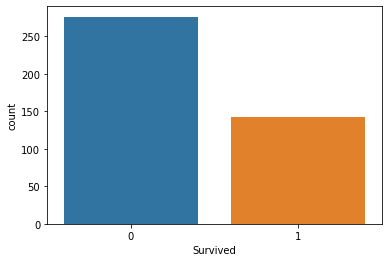

In [34]:
survivor_results = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\gender_submission_pred.csv')
sns.countplot(survivor_results['Survived']);